## **Introduction**

In this project, we use the Heart Disease dataset to build a classification model that predicts whether a patient has heart disease. The workflow includes exploratory data analysis (EDA), preprocessing, model training without pipelines, and evaluation.

### **Importing Libraries and Loading Data**

In [1083]:
#Import a Python package to visualise the variables, to explore the coursework dataset
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [1084]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

Using Colab cache for faster access to the 'heart-disease-data' dataset.


In [1085]:
# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
data = pd.read_csv(file_path)

In [1086]:
# Display the first 10 rows of the dataset
data.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [1087]:
# display the variables names
list(data.columns)

['id',
 'age',
 'sex',
 'dataset',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [1088]:
#the function info() prints summary of a data frame that includes the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [1089]:
#number of instances and features
data.shape

(920, 16)

## **Exploratory Data Analysis (EDA)**

In [1090]:
# a display of basic descriptive statistics for the categorical variables in the dataset
data.describe(include='object')

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


##Let's see the distribution of patients with and without heart disease.

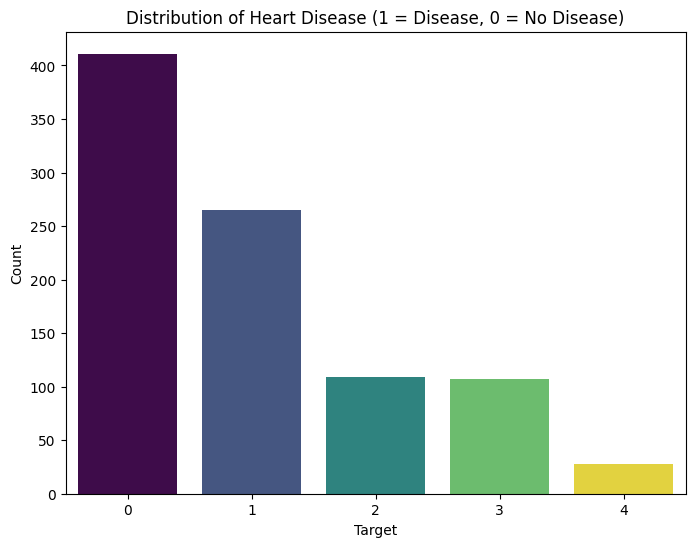

In [1091]:
# 0 is without, and 1-4 is with and the severity
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=data, palette='viridis', hue='num', legend=False)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Features vs. Target

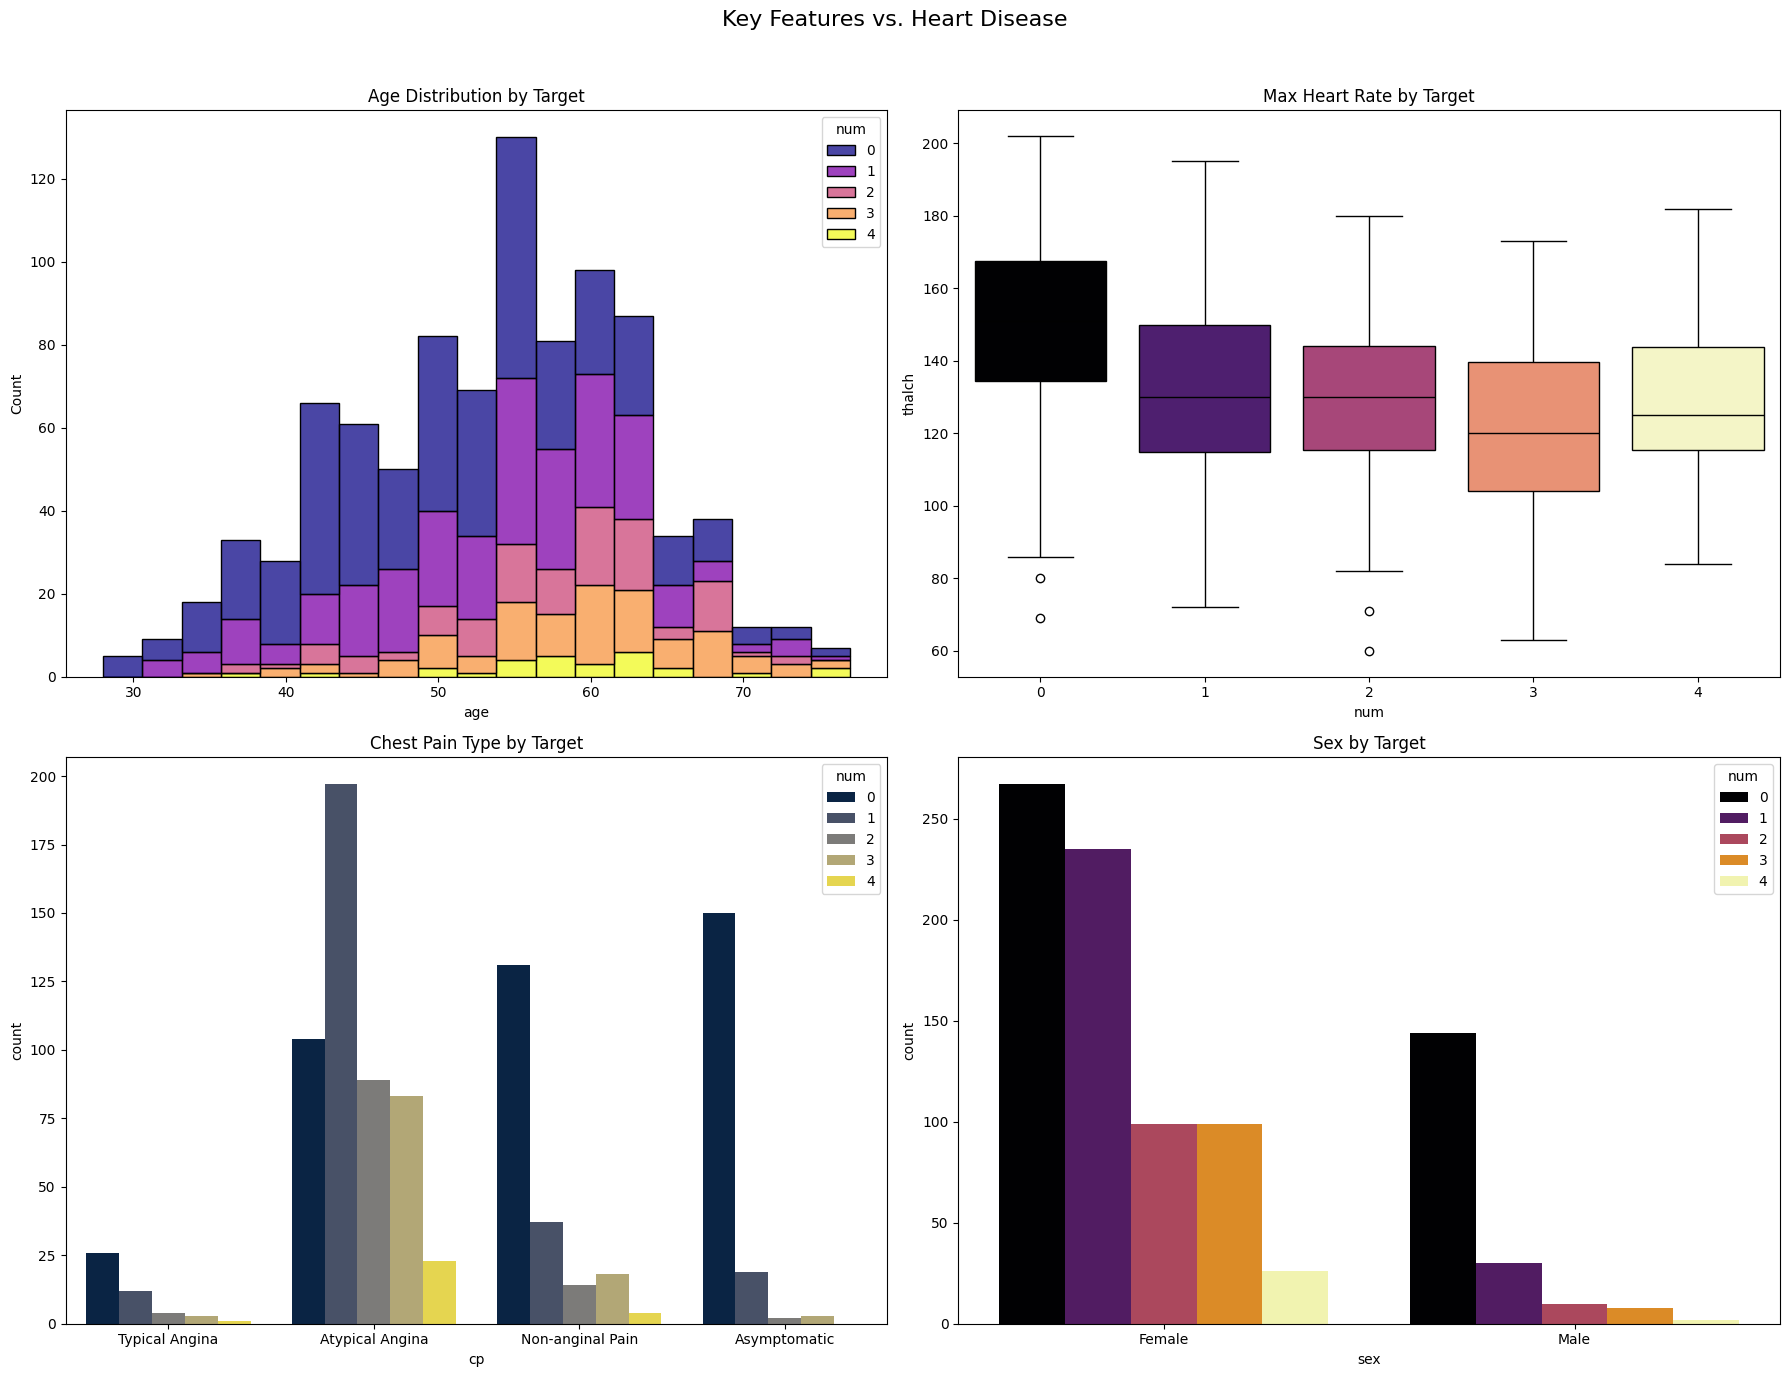

In [1092]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=data, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=data, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=data, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(data['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=data, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(data['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insights:**
- **Max Heart Rate (`thalach`):** Patients with heart disease tend to have a lower maximum heart rate.
- **Chest Pain (`cp`):** Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
- **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

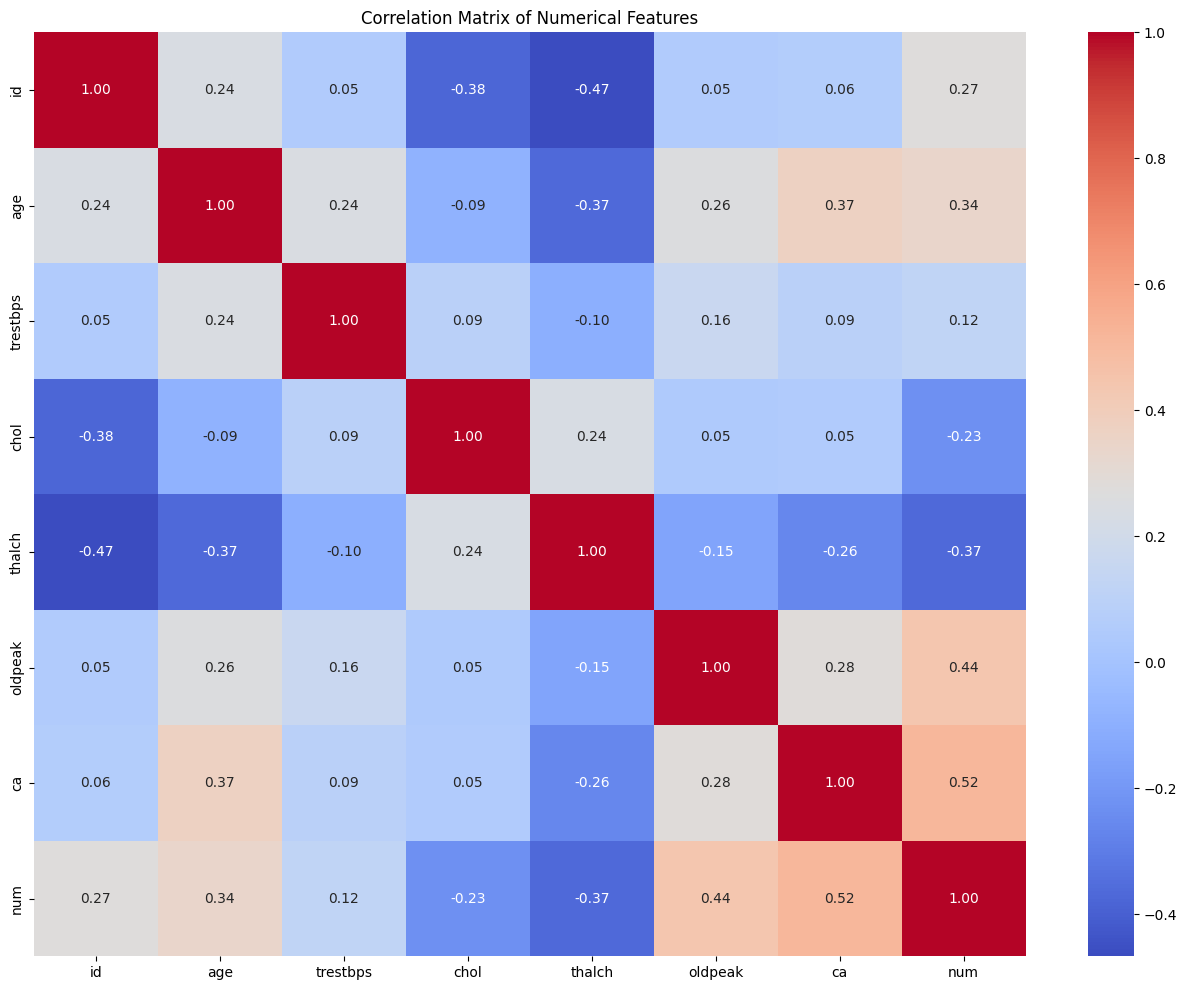

In [1093]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation calculation
numerical_df = data.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## **Unique variables Scan**

In [1094]:
data['age'].unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76, 28, 30, 31, 32, 33, 36, 72, 73, 75])

In [1095]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [1096]:
data['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [1097]:
#chest pain type
data['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [1098]:
#resting blood pressure
data['trestbps'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  98., 190.,  nan, 113.,  92.,
        95.,  80., 185., 116.,   0.,  96., 127.])

In [1099]:
#cholesterol
data['chol'].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [1100]:
#fasting blood sugar
data['fbs'].unique()

array([True, False, nan], dtype=object)

In [1101]:
#ecg category
data['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [1102]:
#max heart rate
data['thalch'].unique()

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 139., 171., 144., 132., 158.,
       114., 151., 161., 179., 120., 112., 137., 157., 169., 165., 123.,
       128., 152., 140., 188., 109., 125., 131., 170., 113.,  99., 177.,
       141., 180., 111., 143., 182., 156., 115., 149., 145., 146., 175.,
       186., 185., 159., 130., 190., 136.,  97., 127., 154., 133., 126.,
       202., 103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105.,
       194., 195., 106., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.,  98., 176., 135., 110.,  nan, 100.,  87., 102.,
        92.,  91.,  82., 119.,  94., 104.,  60.,  83.,  63.,  70.,  77.,
        72.,  78.,  86.,  93.,  67.,  84.,  80., 107.,  69.,  73.])

In [1103]:
#exercise induced angina
data['exang'].unique()

array([False, True, nan], dtype=object)

In [1104]:
#ST depression induced by exercise relative to stress
data['oldpeak'].unique()

array([ 2.3,  1.5,  2.6,  3.5,  1.4,  0.8,  3.6,  0.6,  3.1,  0.4,  1.3,
        0. ,  0.5,  1.6,  1. ,  1.2,  0.2,  1.8,  3.2,  2.4,  2. ,  2.5,
        2.2,  2.8,  3. ,  3.4,  6.2,  4. ,  5.6,  2.9,  0.1,  2.1,  1.9,
        4.2,  0.9,  1.1,  3.8,  0.7,  0.3,  4.4,  5. ,  nan, -1.1, -1.5,
       -0.1, -2.6, -0.7, -2. , -1. ,  1.7, -0.8, -0.5, -0.9,  3.7])

In [1105]:
#slope of peak exercise st segment.
#1 = upsloping, 2 = flat, 3 = downsloping
data['slope'].unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

In [1106]:
#It’s showing as floats because the presence of NaN forces the array dtype to float.
#the vessels that a visualised
data['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [1107]:
#thalassaemia test result
data['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect', nan], dtype=object)

In [1108]:
#diagnosis label 0=no disease, 1-4=severity of disease
data['num'].unique()

array([0, 2, 1, 3, 4])

**Checking the amount of missing data**

In [1109]:
#checking how much data is missing
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [1110]:
# Check for the missing values percentage
data.isna().sum()/len(data)*100

,0
id,0.000000
age,0.000000
sex,0.000000
dataset,0.000000
cp,0.000000
trestbps,6.413043
chol,3.260870
fbs,9.782609
restecg,0.217391
thalch,5.978261


**Dropping unnecessary variables that don't affect heart disease**

In [1111]:
#not yet
#data = data.drop(columns=['id' , 'dataset'])

##**Plotting diagrams of my retained variables**

In [1112]:
#Import Plotly Express for interactive visualisations like box plots and histograms
import plotly.express as px

In [1113]:
age_fig = px.histogram(data, x='age')
age_fig.show()

In [1114]:
sex_fig = px.histogram(data, x='sex')
sex_fig.show()

There are more males in this dataset

In [1115]:
trestbps_fig = px.histogram(data, x='trestbps')
trestbps_fig.show()

In [1116]:
chol_fig = px.histogram(data, x='chol')
chol_fig.show()

In [1117]:
fbs_fig = px.histogram(data, x='fbs')
fbs_fig.show()

In [1118]:
restecg_fig = px.histogram(data, x='restecg')
restecg_fig.show()

In [1119]:
thalch_fig = px.histogram(data, x='thalch')
thalch_fig.show()

In [1120]:
exang_fig = px.histogram(data, x='exang')
exang_fig.show()

In [1121]:
oldpeak_fig = px.histogram(data, x='oldpeak')
oldpeak_fig.show()

In [1122]:
slope_fig = px.histogram(data, x='slope')
slope_fig.show()

In [1123]:
ca_fig = px.histogram(data, x='ca')
ca_fig.show()

In [1124]:
thalch_fig = px.histogram(data, x='thal')
thalch_fig.show()

In [1125]:
# Box plot for age
age_fig = px.box(data, x='age')
age_fig.show()

# Box plot for trestbps
trestbps_fig = px.box(data, x='trestbps')
trestbps_fig.show()

# Box plot for chol
chol_fig = px.box(data, x='chol')
chol_fig.show()

# Box plot for thalch
thalch_fig = px.box(data, x='thalch')
thalch_fig.show()

# Box plot for oldpeak
oldpeak_fig = px.box(data, x='oldpeak')
oldpeak_fig.show()

# Box plot for ca
ca_fig = px.box(data, x='ca')
ca_fig.show()

Removing outliers from the dataset

In [1126]:
# This function identifies outliers in a numeric column using the IQR method.
def find_outliers_IQR(data):

  q1=data.quantile(0.25)

  q3=data.quantile(0.75)

  IQR=q3-q1

  outliers = data[((data<(q1-1.5*IQR))|(data> (q3+1.5*IQR)))]

  return outliers

#set the display
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('display.width', 150)

In [1127]:
outliers = find_outliers_IQR(data['trestbps'])

print("number of outliers: "+ str(len(outliers)))

outliers

number of outliers: 28


,trestbps
14,172.0
83,180.0
126,200.0
172,174.0
183,178.0
188,192.0
201,180.0
213,178.0
231,180.0
338,190.0


In [1128]:
#dropping outlier trestbps in the data
data.drop(data.index[[753]], inplace = True)

In [1129]:
print(data.loc[data['trestbps'] < 80, ['trestbps']])

Empty DataFrame
Columns: [trestbps]
Index: []


In [1130]:
outliers = find_outliers_IQR(data['oldpeak'])

print("number of outliers: "+ str(len(outliers)))

outliers

number of outliers: 16


,oldpeak
91,6.2
121,4.0
123,5.6
126,4.0
183,4.2
191,4.2
211,3.8
285,4.4
293,4.0
567,4.0


In [1131]:
print(data.loc[data['oldpeak'] < 0, ['oldpeak']])

     oldpeak
603     -1.1
609     -1.5
614     -0.1
615     -2.6
629     -0.7
653     -2.0
655     -1.0
656     -1.0
691     -0.8
694     -0.5
696     -0.9
725     -0.5


In [1132]:
data.drop(data.index[[603, 609, 614, 615, 629, 653, 655, 656, 691, 694, 696, 725]], inplace=True, errors='ignore')

In [1133]:
print(data.loc[data['chol'] <1, ['chol']])

     chol
597   0.0
598   0.0
599   0.0
600   0.0
601   0.0
..    ...
818   0.0
819   0.0
822   0.0
839   0.0
840   0.0

[159 rows x 1 columns]


In [1134]:
print(data.loc[data['chol'] >600, ['chol']])

      chol
546  603.0


##**Using the median to deal with missing or NAN values**

In [1135]:
median_trestbps = data['trestbps'].median()
data['trestbps'].fillna(median_trestbps, inplace=True)

median_chol = data['chol'].median()
data['chol'].fillna(median_chol, inplace=True)

median_thalch = data['thalch'].median()
data['thalch'].fillna(median_thalch, inplace=True)

median_oldpeak = data['oldpeak'].median()
data['oldpeak'].fillna(median_oldpeak, inplace=True)

/tmp/ipython-input-2242298599.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-2242298599.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

**Using the mode to deal with missing or NAN values**

In [1136]:
mode_fbs = data['fbs'].mode()[0]
data['fbs'].fillna(mode_fbs, inplace=True)

mode_restecg = data['restecg'].mode()[0]
data['restecg'].fillna(mode_restecg, inplace=True)

mode_exang = data['exang'].mode()[0]
data['exang'].fillna(mode_exang, inplace=True)

/tmp/ipython-input-3509345947.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-3509345947.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-3509345947.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using 

Feature engineering

In [1137]:
# Making unknown category variables for the categorical features
for col in ['slope', 'ca', 'thal']:
    if col in data.columns:
        data[col] = data[col].astype('category')
        if 'Unknown' not in data[col].cat.categories:
            data[col] = data[col].cat.add_categories(['Unknown'])
        data[col] = data[col].fillna('Unknown')

In [1138]:
# Let's check the missing data again
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [1139]:
# sex ('Male', 'Female') -> 0, 1
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

# cp ('typical angina', 'asymptomatic', 'non-anginal', 'atypical angina') -> 0..3
data['cp'] = data['cp'].map({
    'typical angina': 0,
    'asymptomatic': 1,
    'non-anginal': 2,
    'atypical angina': 3
})

# fbs (True, False) -> 1, 0
data['fbs'] = data['fbs'].map({True: 1, False: 0})

# exang (False, True) -> 0, 1
data['exang'] = data['exang'].map({False: 0, True: 1})

# restecg ('lv hypertrophy', 'normal', 'st-t abnormality') -> 0..2 (order you listed)
data['restecg'] = data['restecg'].map({
    'lv hypertrophy': 0,
    'normal': 1,
    'st-t abnormality': 2
})

# slope ('downsloping', 'flat', 'upsloping', 'Unknown') -> 0..3 (order you listed)
data['slope'] = data['slope'].map({
    'downsloping': 0,
    'flat': 1,
    'upsloping': 2,
    'Unknown': 3
})

# ca ([0.0, 1.0, 2.0, 3.0, 'Unknown']) -> keep ordinal 0..3; Unknown -> 4
data['ca'] = data['ca'].map({
    0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3,
    'Unknown': 4
})

# thal ('fixed defect', 'normal', 'reversable defect', 'Unknown') -> 0..3 (order you listed)
data['thal'] = data['thal'].map({
    'fixed defect': 0,
    'normal': 1,
    'reversable defect': 2,
    'Unknown': 3
})

In [1140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        907 non-null    int64   
 1   age       907 non-null    int64   
 2   sex       907 non-null    int64   
 3   dataset   907 non-null    object  
 4   cp        907 non-null    int64   
 5   trestbps  907 non-null    float64 
 6   chol      907 non-null    float64 
 7   fbs       907 non-null    int64   
 8   restecg   907 non-null    int64   
 9   thalch    907 non-null    float64 
 10  exang     907 non-null    int64   
 11  oldpeak   907 non-null    float64 
 12  slope     907 non-null    category
 13  ca        907 non-null    category
 14  thal      907 non-null    category
 15  num       907 non-null    int64   
dtypes: category(3), float64(4), int64(8), object(1)
memory usage: 102.5+ KB


In [1141]:
data['trestbps'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  98., 190., 113.,  92.,  95.,
        80., 185., 116.,  96., 127.])

In [1142]:
data['trestbps'] = data['trestbps'].astype('int64')

In [1143]:
data['thalch'].unique()

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 139., 171., 144., 132., 158.,
       114., 151., 161., 179., 120., 112., 137., 157., 169., 165., 123.,
       128., 152., 140., 188., 109., 125., 131., 170., 113.,  99., 177.,
       141., 180., 111., 143., 182., 156., 115., 149., 145., 146., 175.,
       186., 185., 159., 130., 190., 136.,  97., 127., 154., 133., 126.,
       202., 103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105.,
       194., 195., 106., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.,  98., 176., 135., 110., 100.,  87., 102.,  92.,
        91.,  82., 119.,  94., 104.,  60.,  83.,  63.,  70.,  77.,  72.,
        78.,  86.,  93.,  67.,  84.,  80., 107.,  69.,  73.])

In [1144]:
data['thalch'] = data['thalch'].astype('int64')

In [1145]:
#Oldpeak is mostly between 0–4
data['oldpeak'].unique()

array([2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0. , 0.5,
       1.6, 1. , 1.2, 0.2, 1.8, 3.2, 2.4, 2. , 2.5, 2.2, 2.8, 3. , 3.4,
       6.2, 4. , 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3,
       4.4, 5. , 1.7, 3.7])

In [1146]:
data['chol'].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [1147]:
data.drop(data.index[[546]], inplace=True, errors='ignore')

In [1148]:
# flag rows with 0
zero_idx = data.index[data['chol'] == 0]
print("Number of 0 chol rows:", len(zero_idx))

Number of 0 chol rows: 159


In [1149]:
# Flag invalid chol values
data['chol_0_values'] = (data['chol'] == 0).astype(int)

In [1150]:
# Replace 0 with NaN
data.loc[data['chol'] == 0, 'chol'] = np.nan

In [1151]:
# Impute with median
data['chol'] = data['chol'].fillna(data['chol'].median())

In [1152]:
data['chol'] = data['chol'].astype('int64')

I will keep chol as float because clinically the numbers (exammple 1.4 and 0.8) are very different if I turn them into int64, I will lose the precision that my classifier can use.

## **Model training without Pipelines:**
## Logistic Regression

In [1153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import pandas as pd

In [1154]:
#  Split features and target
# Drop non-predictive columns
X = data.drop(columns=['id','dataset','num'])
y = (data['num'] > 0).astype(int)   # convert to binary target

In [1155]:
# OHE the categorical variables for LR
X = pd.get_dummies(X, columns=['slope','ca','thal'], drop_first=True)

In [1156]:
#Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [1157]:
# Train Logistic Regression
clf = LogisticRegression(max_iter=2000, class_weight="balanced")
clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(class_weight='balanced', max_iter=2000)

In [1158]:
# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.88      0.86      0.87       100

    accuracy                           0.86       182
   macro avg       0.86      0.86      0.86       182
weighted avg       0.86      0.86      0.86       182



##

In [1159]:
# Train plain Logistic Regression
clf = LogisticRegression(max_iter=2000, solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='liblinear')

In [1160]:
# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [1161]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

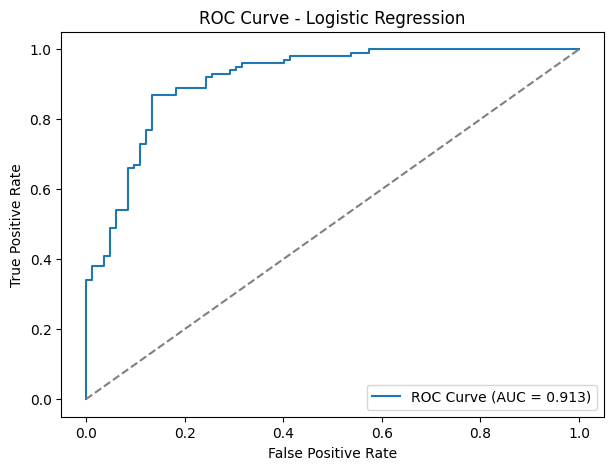

AUC Score: 0.9134146341463415


In [1162]:
# Plot
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", auc_score)

##**Results**

The Logistic Regression model achieved 85% accuracy and an AUC of 0.91, indicating strong ability to distinguish between patients with and without heart disease.

## No disease

The model achieved a precision of 83% when predicting the absence of heart disease, meaning that 83% of patients classified as healthy were truly healthy.

## The model has a recall of 85%

It correctly identifies 85% of the actual healthy patients.

## Has a sensitivity of 86% for Heart Disease

The model demonstrates strong diagnostic capability, correctly identifying 88% of predicted disease cases (precision) and detecting 86% of all true disease cases (recall).




This means that the models performance is balanced, there no bias towards one class.

## Summary

The Logistic Regression model achieved an accuracy of 85.7%, with precision of 0.88 and recall of 0.86 for the disease class. The AUC score was 0.91, indicating strong discriminatory power. Performance was well-balanced across classes, suggesting the model is reliable for detecting both healthy and diseased patients.

##**Confusion Matrix**

In [1163]:
# Get predictions from your trained model
y_pred = clf.predict(X_test)

In [1164]:
# Build confusion matrix
cm = confusion_matrix(y_test, y_pred)

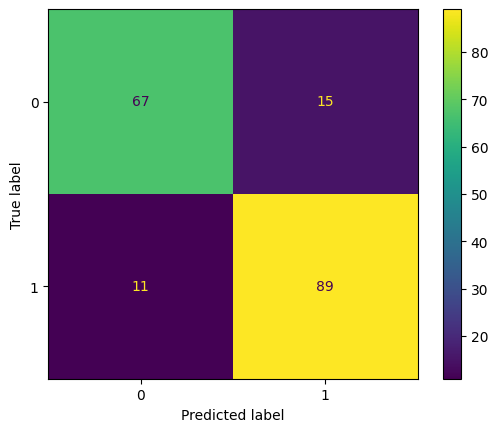

In [1166]:
# Importing confusion_matrix and ConfusionMatrixDisplay to evaluate classification performance visually
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generating the confusion matrix using actual vs. predicted labels on the test set
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Displaying the confusion matrix with proper class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

67 True Negatives (correctly predicted healthy patients)

15 False Positives (healthy patients wrongly classified as diseased). The patient may go through unnecessary tests, stress, or treatment.
It costs time and resources but usually doesn’t endanger the patient’s life.

11 False Negatives- Very dangerous (diseased patients missed). A sick patient may not get treatment, which can lead to serious complications or death.

89 True Positives (correctly predicted diseased patients)



The confusion matrix shows that the model correctly identified 67 patients without heart disease and 89 patients with heart disease.

It misclassified 15 healthy patients as diseased (false positives) and missed 11 true cases of heart disease (false negatives).

This CM shows 182 samples build from the test data.

In medical ML, the focus is usually on having high recall, a low false negative, over raw accuracy.